<a href="https://colab.research.google.com/github/abybordi/DataVisualizationProject/blob/master/week4_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.tree import export_graphviz
import graphviz, re
pd.set_option('display.max_columns', 50)

Mounted at /content/drive


In [74]:

## From fastai library
def draw_tree(t, df, size=10, ratio=0.6, precision=1):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, 
                      #feature_names=df.columns,
                      filled=True,
                      special_characters=True, rotate=True, precision=precision)
    display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

In [3]:
df = pd.read_csv('/content/drive/My Drive/data/week4_dm_2 - Sheet1.csv', header=None)

In [4]:
df.drop([12], axis=1, inplace=True)

In [6]:
er_columns=  ['x'+str(i) for i in range(28)]
static_labels = ['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership']
new_df_columns = static_labels + er_columns
df.columns = new_df_columns

In [7]:
ready_to_pairplot = df[['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership', ]]
       

In [14]:
import seaborn as sns

### Exploratory Data Analysis (week1 dataset results)

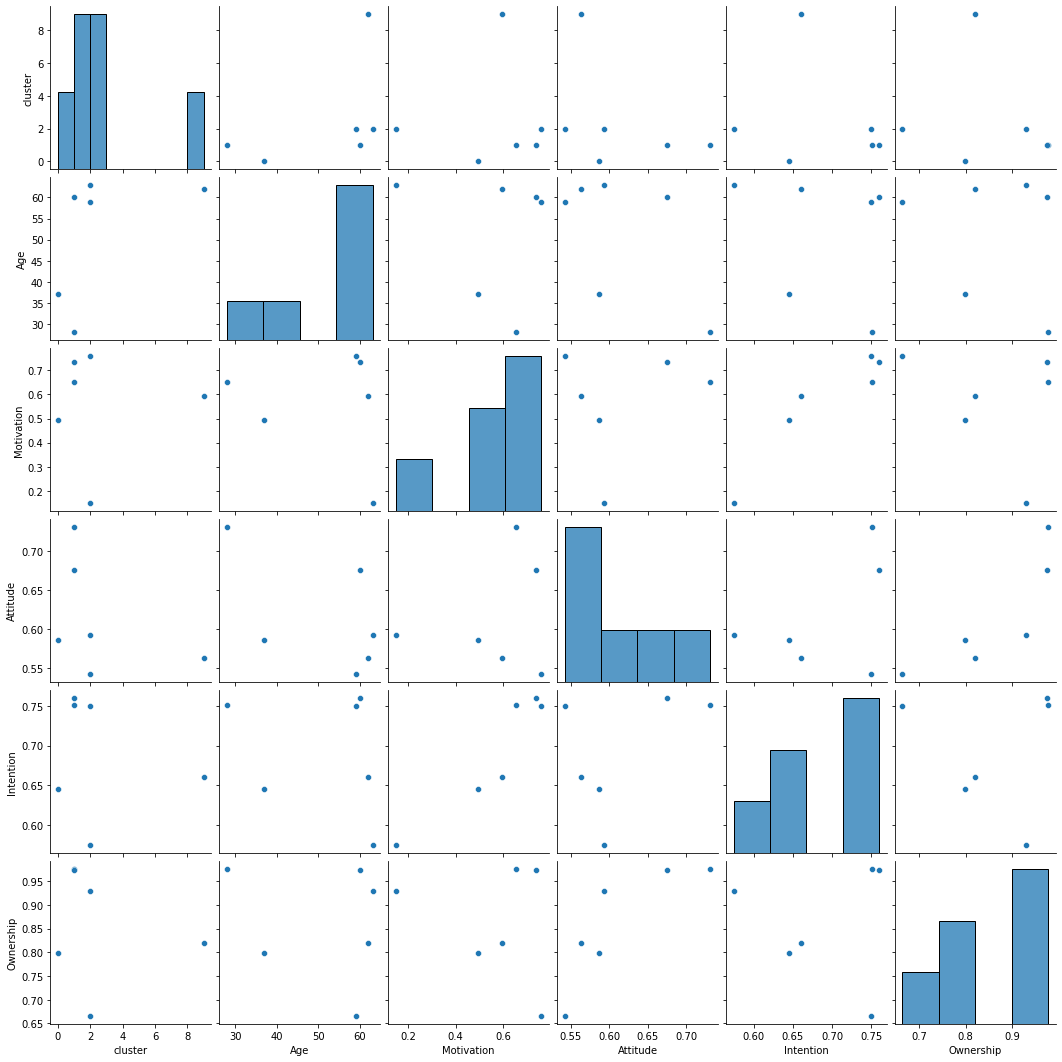

In [15]:
sns.pairplot(ready_to_pairplot)

In [9]:
df.columns

Index(['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27'],
      dtype='object')

In [10]:
df.shape

(6, 40)

In [11]:
df.columns

Index(['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cluster           6 non-null      int64  
 1   Gender            6 non-null      object 
 2   Age               6 non-null      int64  
 3   Ethnicity         6 non-null      object 
 4   Income            6 non-null      object 
 5   Work hours        6 non-null      object 
 6   Health condition  6 non-null      object 
 7   Education         6 non-null      object 
 8   Motivation        6 non-null      float64
 9   Attitude          6 non-null      float64
 10  Intention         6 non-null      float64
 11  Ownership         6 non-null      float64
 12  x0                6 non-null      object 
 13  x1                6 non-null      float64
 14  x2                4 non-null      object 
 15  x3                4 non-null      float64
 16  x4                4 non-null      object 
 17  x

In [17]:
df.shape

(6, 40)

In [18]:
columns = list(range(28))

In [21]:
only_odd = ['x'+str(num) for num in columns if num % 2 == 1]

In [23]:
ers= df.loc[:,only_odd]

In [24]:
ers= ers.reset_index(drop=True)

In [25]:
new_column = np.zeros(7,)

In [26]:
new_predictions = pd.DataFrame(new_column, columns=['ER.15'])

In [27]:
ers = pd.concat([ers, new_predictions], axis=1)

In [28]:
#plot the autocorrelations, we can see that the information of almost how many weeks ago is important
from pandas.plotting import autocorrelation_plot



### Plotting autocorrelations

In [32]:
def make_autocorrelation_plot(ers, person_index):
  autocorrelation_plot(ers.iloc[person_index,:].astype(np.float))
  plt.show()

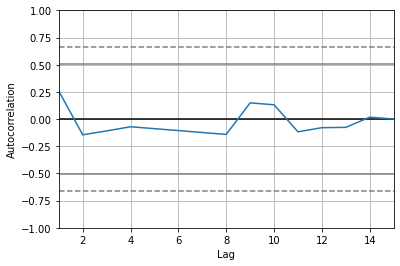

In [33]:
make_autocorrelation_plot(ers, 0)

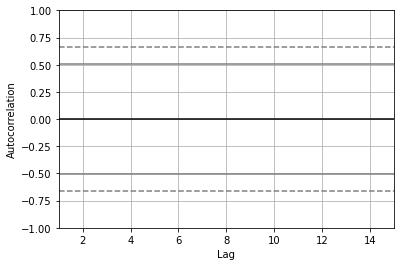

In [34]:
make_autocorrelation_plot(ers, 1)

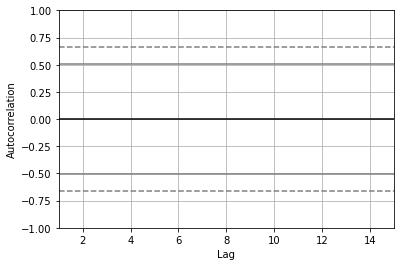

In [35]:
make_autocorrelation_plot(ers, 2)

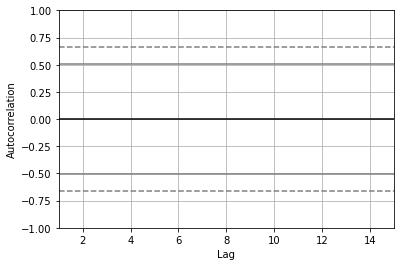

In [36]:
make_autocorrelation_plot(ers, 3)

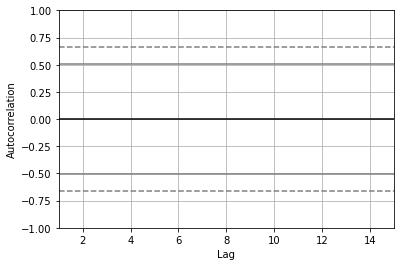

In [37]:
make_autocorrelation_plot(ers, 4)

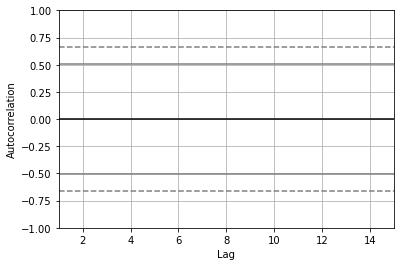

In [38]:
make_autocorrelation_plot(ers, 5)

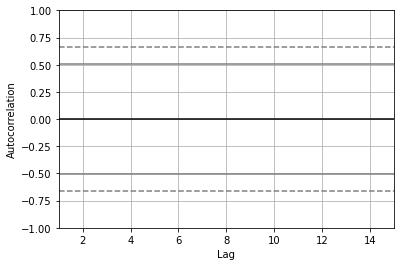

In [39]:
make_autocorrelation_plot(ers, 6)

Not related to the past! This is not a time series!

### Plotting the line chart of every person's ER time series

In [40]:
def make_line_chart_of_person(index_of_person, ers, n_valid = 4 ):
    time_series = ers.loc[index_of_person].values
    n = len(time_series)
    
    idx =np.arange(n)
    train_idx = idx[:-n_valid]
    valid_idx = idx[-n_valid:]
    ## Make sure you shuffle the data after you split the train/valid set
    np.random.shuffle(train_idx)
    np.random.shuffle(valid_idx)
    x=np.arange(n)
    y = time_series
    y = y.astype(np.float)
    plt.plot(list(x),list(y))

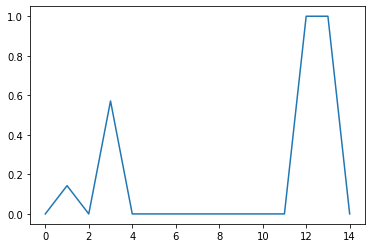

In [41]:
make_line_chart_of_person(0, ers, n_valid = 1 )

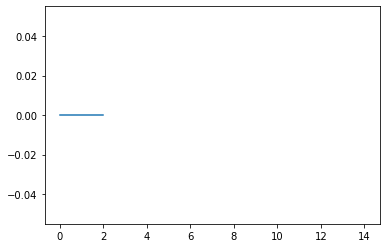

In [42]:
make_line_chart_of_person(1, ers, n_valid = 1 )

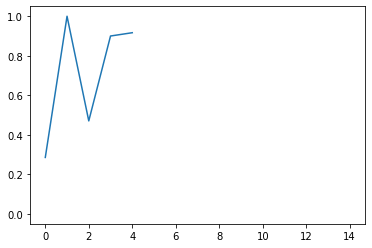

In [43]:
make_line_chart_of_person(2, ers, n_valid = 1 )

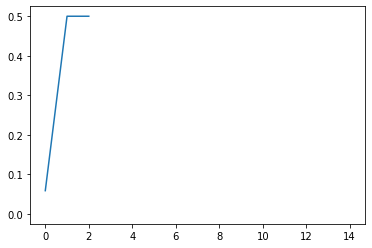

In [44]:
make_line_chart_of_person(3, ers, n_valid = 1 )

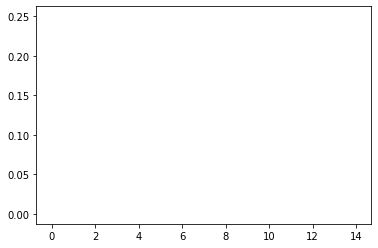

In [45]:
make_line_chart_of_person(4, ers, n_valid = 1 )

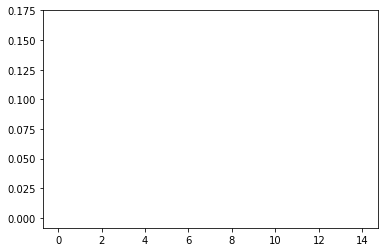

In [46]:
make_line_chart_of_person(5, ers, n_valid = 1 )

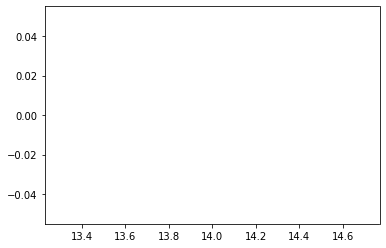

In [47]:
make_line_chart_of_person(6, ers, n_valid = 1 )

### WEEK4 Decision tree with one week recomendation and  engagement ratio as the input variable 




In [48]:
dropped_df = df

In [49]:
er_columns=  ['x'+str(i) for i in range(28)]

In [50]:
static_labels = ['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership']

In [51]:
new_df_columns = static_labels + er_columns

In [52]:
dropped_df.columns = new_df_columns

In [53]:
new_dataframe = pd.DataFrame(columns=['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership','Recomendation', 'Target_ER'])
  

In [54]:
def make_row_one_person_week(dropped_df, person_index, week):
  static_features = dropped_df.iloc[person_index,:12]
  static_features = static_features.reset_index(drop=True)
  static_features_df = pd.DataFrame([static_features.values])
  rec_er = dropped_df.iloc[0, 11+week:13+week]
  rec_er = rec_er.reset_index(drop=True)
  rec_er[1] = float(rec_er[1])
  rec_er_df = pd.DataFrame([rec_er.values])
  new_row = pd.concat([static_features_df, rec_er_df], axis=1, ignore_index=True)
  new_row.columns = ['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership','Recomendation', 'Target_ER']
  return new_row

In [55]:
for person_index in range(len(dropped_df)):
  dropped_df_row = dropped_df.iloc[person_index, :].dropna()
  for week_index in range(int((dropped_df_row.shape[0]-12)/2)):
    week = 2*week_index + 1
    current_row = make_row_one_person_week(dropped_df, person_index, week)
    new_dataframe = new_dataframe.append(current_row, ignore_index=True)

### Individual read week 4

In [ ]:
2/2

1.0

In [ ]:
dropped_df_row.shape[0]-13

27

In [ ]:
week_index

14

In [ ]:
dropped_df_row = dropped_df.iloc[person_index, :].dropna()

In [ ]:
dropped_df_row.shape

(40,)

In [ ]:
week_index

14

In [ ]:
week

29

In [ ]:
static_features = dropped_df.iloc[person_index,:12]

In [ ]:
  static_features = static_features.reset_index(drop=True)


In [ ]:
  static_features_df = pd.DataFrame([static_features.values])


In [ ]:
  rec_er = dropped_df.iloc[0, 11+week:13+week]


In [ ]:
rec_er

Series([], Name: 0, dtype: object)

In [ ]:
make_row_one_person_week(dropped_df, person_index, week)

KeyError: ignored

In [ ]:
new_dataframe

,cluster,Gender,Age,Ethnicity,Income,Work hours,Health condition,Education,Motivation,Attitude,Intention,Ownership,Recomendation,Target_ER
0,0,Female,44,Caucasian,"150,000-199,999",50+ hrs/week,Good,4-year college degree,0.265623,0.526590,0.507169,0.559363,Phy,0.166667
1,0,Female,44,Caucasian,"150,000-199,999",50+ hrs/week,Good,4-year college degree,0.265623,0.526590,0.507169,0.559363,diet,0.714286
2,0,Female,44,Caucasian,"150,000-199,999",50+ hrs/week,Good,4-year college degree,0.265623,0.526590,0.507169,0.559363,diet,0.428571
3,0,Female,44,Caucasian,"150,000-199,999",50+ hrs/week,Good,4-year college degree,0.265623,0.526590,0.507169,0.559363,diet,0.571429
4,0,Female,44,Caucasian,"150,000-199,999",50+ hrs/week,Good,4-year college degree,0.265623,0.526590,0.507169,0.559363,diet,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,Male,81,Caucasian,"25,000-49,000",36-50 hrs/week,Good,2-year college degree,0.101779,0.989535,0.849737,0.919458,diet,0.571429
71,1,Male,81,Caucasian,"25,000-49,000",36-50 hrs/week,Good,2-year college degree,0.101779,0.989535,0.849737,0.919458,diet,0.500000
72,1,Male,81,Caucasian,"25,000-49,000",36-50 hrs/week,Good,2-year college degree,0.101779,0.989535,0.849737,0.919458,Phy,0.000000
73,1,Male,81,Caucasian,"25,000-49,000",36-50 hrs/week,Good,2-year college degree,0.101779,0.989535,0.849737,0.919458,Phy,0.000000


In [ ]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cluster           75 non-null     object 
 1   Gender            75 non-null     object 
 2   Age               75 non-null     object 
 3   Ethnicity         75 non-null     object 
 4   Income            75 non-null     object 
 5   Work hours        75 non-null     object 
 6   Health condition  75 non-null     object 
 7   Education         75 non-null     object 
 8   Motivation        75 non-null     float64
 9   Attitude          75 non-null     float64
 10  Intention         75 non-null     float64
 11  Ownership         75 non-null     float64
 12  Recomendation     75 non-null     object 
 13  Target_ER         75 non-null     float64
dtypes: float64(5), object(9)
memory usage: 8.3+ KB


### Preparing to train for week 4

In [56]:
features = new_dataframe.columns


In [57]:
features

Index(['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership', 'Recomendation', 'Target_ER'],
      dtype='object')

In [58]:
numerical_features = ['Age','Motivation', 'Attitude', 'Intention',
       'Ownership']

In [59]:
categorical_features = list(features[~features.isin(numerical_features) ])

In [60]:
categorical_features.remove('Target_ER')

In [61]:
new_dataframe.loc[:,'Age'] = new_dataframe.loc[:,'Age'].astype(int)

In [ ]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cluster           27 non-null     object 
 1   Gender            27 non-null     object 
 2   Age               27 non-null     int64  
 3   Ethnicity         27 non-null     object 
 4   Income            27 non-null     object 
 5   Work hours        27 non-null     object 
 6   Health condition  27 non-null     object 
 7   Education         27 non-null     object 
 8   Motivation        27 non-null     float64
 9   Attitude          27 non-null     float64
 10  Intention         27 non-null     float64
 11  Ownership         27 non-null     float64
 12  Recomendation     27 non-null     object 
 13  Target_ER         27 non-null     float64
dtypes: float64(5), int64(1), object(8)
memory usage: 3.1+ KB


### One hot encoding

In [62]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [63]:
transformer_1 = ColumnTransformer([
    ('transformer1', StandardScaler(), numerical_features),
    ('transformer', Pipeline([('encode', OneHotEncoder(drop='first')), 
                              ('scale', StandardScaler(with_mean=False))]), categorical_features), 
])

In [64]:
#make input and output variables
input = new_dataframe.iloc[:,:-1]
target = new_dataframe.iloc[:,-1]

In [65]:
transformer_1 = transformer_1.fit(input)

In [66]:
transformed_input = transformer_1.transform(input)

In [ ]:
counts=[]
for column in categorical_features:
    counts.append(categorical_df[column].value_counts())

In [ ]:
counts

[1    45
 2    15
 0    15
 Name: cluster, dtype: int64, Male      45
 Female    30
 Name: Gender, dtype: int64, Asian        30
 Caucasian    30
 HIspanic     15
 Name: Ethnicity, dtype: int64, 100,000-149,999    30
 0-24,999           15
 25,000-49,000      15
 150,000-199,999    15
 Name: Income, dtype: int64, 36-50 hrs/week    30
 50+ hrs/week      30
 16-35 hrs/week    15
 Name: Work hours, dtype: int64, Good         45
 Fair         15
 Excellent    15
 Name: Health condition, dtype: int64, 4-year college degree          30
 2-year college degree          30
 Some college, but no degree    15
 Name: Education, dtype: int64, diet    55
 Phy     20
 Name: Recomendation, dtype: int64]

In [67]:
from sklearn import tree
decision_tree = tree.DecisionTreeRegressor()
decision_tree = decision_tree.fit(transformed_input, target)

In [68]:
errors_dict = dict()

### Week 4 predictions 

In [69]:
dropped_df = dropped_df[['cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership']]

In [70]:
predictions =  pd.DataFrame(columns=['Recomendation', 'Predicted_ER'])
  

In [71]:
def predict_row(dropped_df, row_number,model, transformer):

  static_features = pd.DataFrame([dropped_df.iloc[row_number, :]])
  static_features = static_features.reset_index(drop=True)

  recomend_phys = pd.DataFrame(['Phy'], columns =['Recomendation'])
  recomend_phys = recomend_phys.reset_index(drop=True)
  phys_row= pd.concat([static_features, recomend_phys], axis=1, ignore_index=True)
  phys_row.columns = [ 'cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership', 'Recomendation']
  transformed_phy= transformer.transform(phys_row)
  recomend_diet = pd.DataFrame(['diet'], columns =['Recomendation'])
  diet_row= pd.concat([static_features, recomend_phys], axis=1, ignore_index=True)
  diet_row.columns = [ 'cluster', 'Gender', 'Age', 'Ethnicity', 'Income', 'Work hours',
       'Health condition', 'Education', 'Motivation', 'Attitude', 'Intention',
       'Ownership', 'Recomendation']
  transformed_diet= transformer.transform(diet_row)
  phy_er = model.predict(transformed_phy)
  diet_er = model.predict(transformed_diet)
  if phy_er > diet_er:
    return 'Phy', phy_er
  else: 
    return 'diet', diet_er

In [72]:
for row_number in range(len(dropped_df)):
  recom, er = predict_row(dropped_df, row_number,decision_tree, transformer_1)
  row_predictions = pd.DataFrame([[recom, er]],columns=['Recomendation', 'Predicted_ER'] )
  predictions = predictions.append(row_predictions,ignore_index=True)

In [ ]:
predictions

,Recomendation,Predicted_ER
0,diet,[0.06493506493636364]
1,diet,[0.07142857144999999]
2,diet,[0.178571428575]
3,diet,[0.07142857144999999]
4,diet,[0.07142857144999999]
5,diet,[0.07142857144999999]


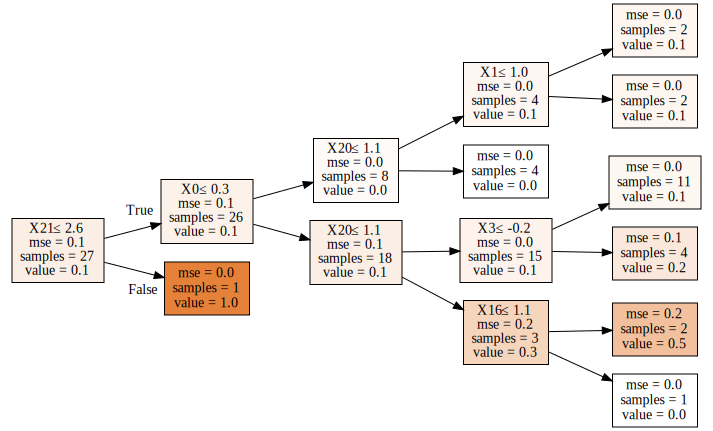

In [75]:
draw_tree(decision_tree,transformed_input)